In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from functions import *
import matplotlib.pyplot as plt
import folium 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import cluster
from scipy.cluster.hierarchy import linkage,fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Paramètres graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['font.size'] = 16

## Nettoyage des données

In [3]:
vg=pd.read_csv("vgsales.csv")
vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
# Apprendre les types de colonnes et le nombre de valeurs non nulles dans ces colonnes
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# vérification de valeurs manquantes 
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

-Suppression des valeurs nulles dans la colonne « Publisher » et imputation des valeurs manquantes dans la colonne « Année » avec sa valeur médiane.

-Ci-dessous, nous mettrons ces valeurs manquantes en perspective en voyant le pourcentage des valeurs NaN sur les valeurs totales pour chaque colonne

In [6]:
vg.dropna(subset=["Publisher"], inplace=True) #suppression des valeurs manuquantes
vg["Year"].fillna(vg["Year"].median(), inplace=True)# mettre le valeurs médiane
vg["Year"] = vg["Year"].astype("int64") 

In [7]:
# Vérification des doublons
vg.duplicated().sum()

0

In [8]:
vg.nunique()

Rank            16540
Name            11442
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [9]:
#les jeux les plus vendus au japon
highest_game_sales_jp=vg.sort_values("JP_Sales",ascending=False)
highest_game_sales_jp

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
...,...,...,...,...,...,...,...,...,...,...,...
7161,7163,Dark Souls II,XOne,2015,Role-Playing,Namco Bandai Games,0.13,0.07,0.00,0.02,0.22
7162,7164,Discovery Kids: Dolphin Discovery,DS,2008,Simulation,505 Games,0.21,0.00,0.00,0.01,0.22
7163,7165,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,0.00,0.04,0.22
7165,7167,Skies of Arcadia Legends,GC,2002,Role-Playing,Atari,0.17,0.04,0.00,0.01,0.22


In [10]:
#les jeux les plus vendus au USA
highest_game_sales_usa=vg.sort_values("NA_Sales",ascending=False)
highest_game_sales_usa

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
...,...,...,...,...,...,...,...,...,...,...,...
13576,13578,Kanuchi: Shiroki Tsubasa no Shou,PS2,2008,Adventure,Idea Factory,0.00,0.00,0.04,0.00,0.04
13577,13579,Summer Athletics 2009,X360,2009,Sports,49Games,0.00,0.04,0.00,0.00,0.04
10118,10120,Pro Yaky? Spirits 5,PS3,2008,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11
13579,13581,Katekyoo Hitman Reborn! Battle Arena,PSP,2008,Fighting,Marvelous Interactive,0.00,0.00,0.04,0.00,0.04


In [11]:
#les jeux les plus vendus au union européenne
highest_game_sales_eu=vg.sort_values("EU_Sales",ascending=False)
highest_game_sales_eu

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
...,...,...,...,...,...,...,...,...,...,...,...
10746,10748,Derby Jockey 2,SNES,1995,Sports,Asmik Corp,0.00,0.00,0.10,0.00,0.10
10745,10747,Rapala Pro Bass Fishing 2010,DS,2010,Sports,Activision,0.09,0.00,0.00,0.01,0.10
10744,10746,Option Tuning Car Battle,PS,1998,Racing,MTO,0.00,0.00,0.09,0.01,0.10
795,797,Wipeout: The Game,Wii,2009,Misc,Mindscape,1.97,0.00,0.00,0.12,2.09


In [12]:
for idx,column in enumerate(vg.columns):
       print(idx,column)

0 Rank
1 Name
2 Platform
3 Year
4 Genre
5 Publisher
6 NA_Sales
7 EU_Sales
8 JP_Sales
9 Other_Sales
10 Global_Sales


In [13]:
o_vg=vg.iloc[:,[4,6,7,8,9,10]]
o_vg

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.49,29.02,3.77,8.46,82.74
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Sports,15.75,11.01,3.28,2.96,33.00
4,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,Platform,0.01,0.00,0.00,0.00,0.01
16594,Shooter,0.01,0.00,0.00,0.00,0.01
16595,Racing,0.00,0.00,0.00,0.00,0.01
16596,Puzzle,0.00,0.01,0.00,0.00,0.01


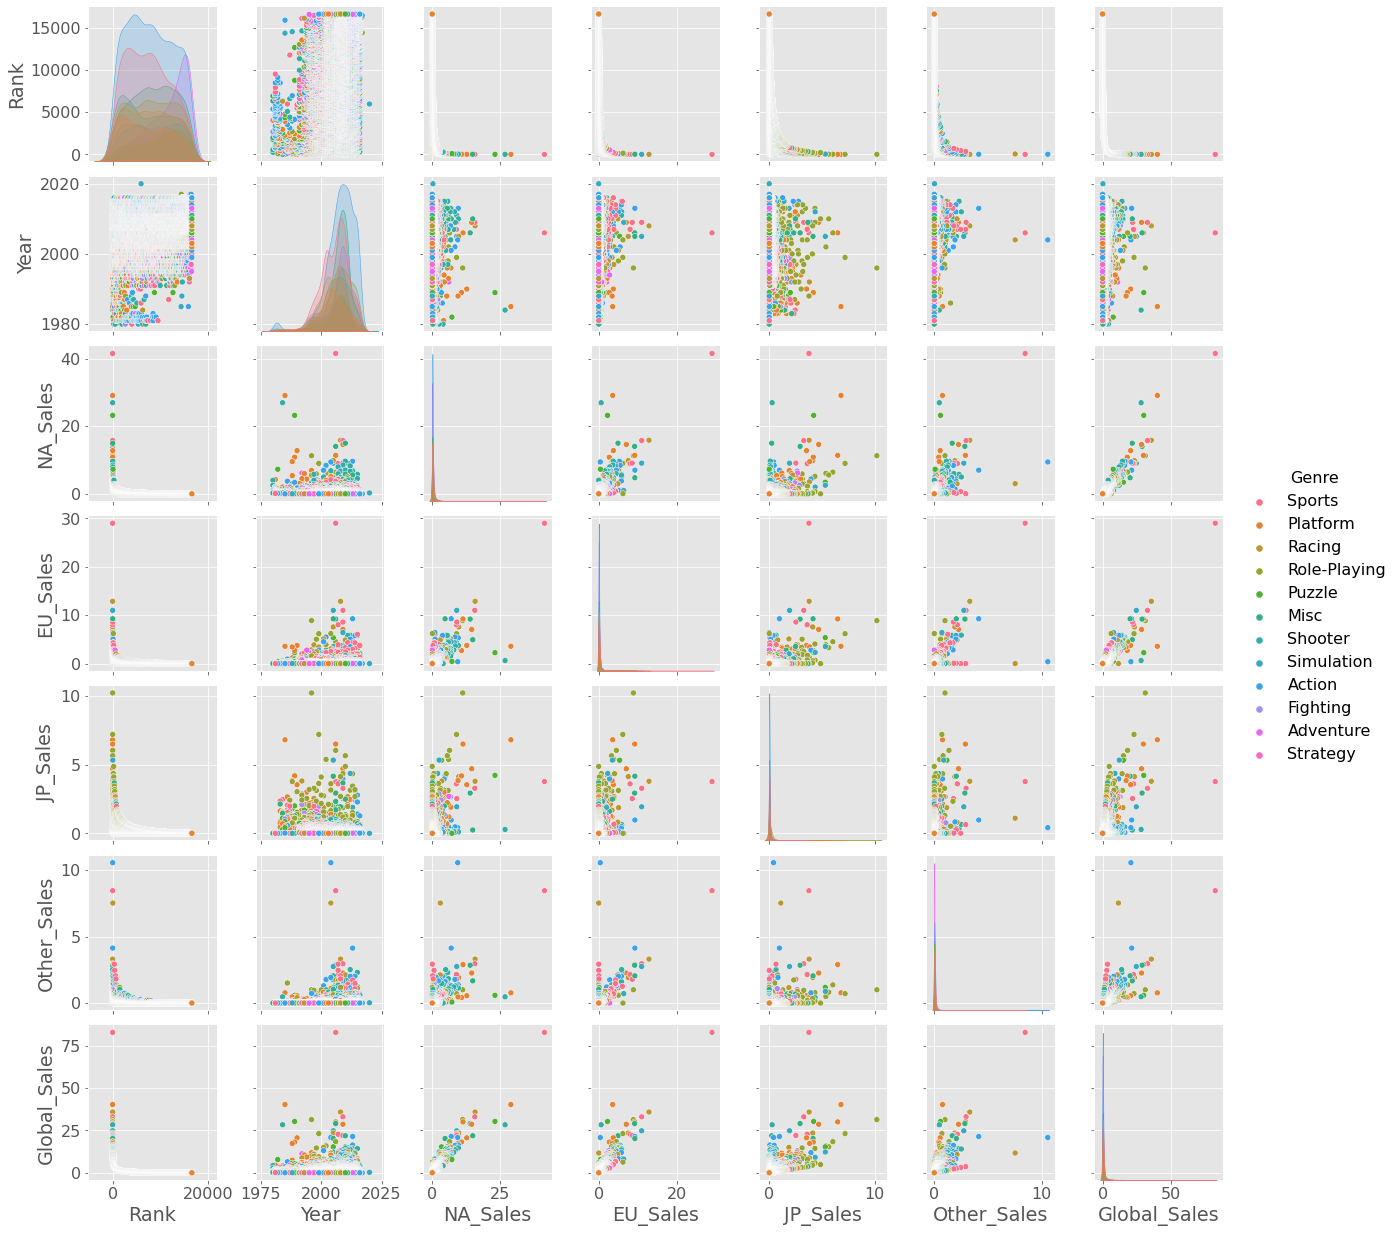

In [14]:
#preséntation graphiques univarie et bivaries 
sns.pairplot(vg,kind="scatter",hue="Genre")
plt.savefig("image_scatter")
plt.show()

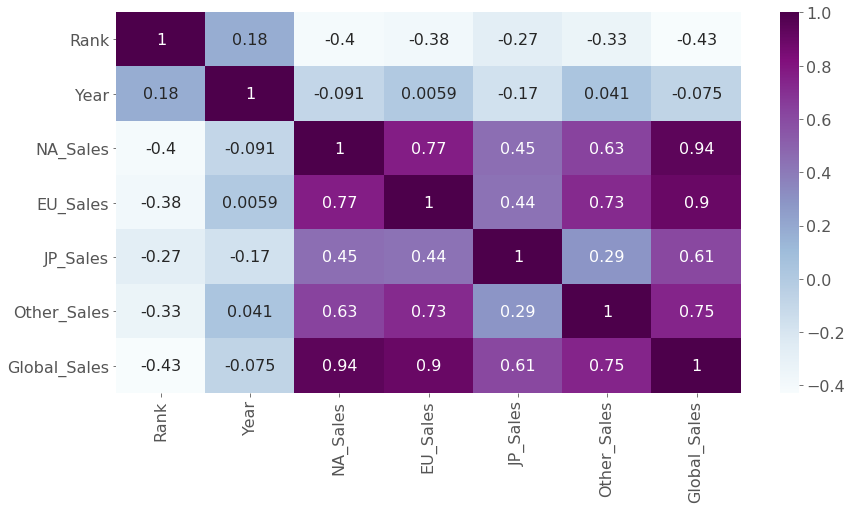

In [15]:
# matrice de corrélation
tt_corr=vg.corr()
sns.heatmap(tt_corr,annot=True ,cmap="BuPu")
plt.savefig("image_matrice corr")
plt.show()

In [16]:
vg.loc[vg['Name'] == 'Call of Duty: Black Ops II']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
1217,1219,Call of Duty: Black Ops II,PC,2012,Shooter,Activision,0.63,0.69,0.00,0.21,1.53
4554,4556,Call of Duty: Black Ops II,WiiU,2012,Shooter,Activision,0.21,0.18,0.00,0.03,0.43


Ci-dessus, nous voyons que ce jeu a plusieurs rangées ; Ceci est valable, cependant, car chaque ligne représente le jeu sur une plate-forme différente.

In [17]:
vg.loc[vg['Name'] == 'Super Mario Bros.']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
200,201,Super Mario Bros.,GB,1999,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07


Comme nous l'avons vu ci-dessus, un jeu peut avoir plusieurs lignes car chaque ligne affiche le jeu sur une plate-forme différente. Cela dit, ce serait bien de voir les ventes combinées de chaque jeu sur toutes ses plateformes. Nous allons donc le faire ci-dessous !

In [18]:
vg_sales_all_plat = vg.groupby(['Name'], as_index=False)['Global_Sales'].sum()
vg_sales_all_plat = vg_sales_all_plat.sort_values(['Global_Sales'], ascending=False)

In [19]:
vg_sales_all_plat.loc[vg_sales_all_plat['Name'] == 'Super Mario Bros.']

,Name,Global_Sales
9289,Super Mario Bros.,45.31


In [20]:
vg_top_genre = vg.groupby(['Genre'], as_index=False)['Global_Sales'].sum()
vg_top_genre = vg_top_genre.sort_values(['Global_Sales'], ascending=False)

In [21]:
highest_game_sales_vg=vg.sort_values("JP_Sales",ascending=False)
highest_game_sales_vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
...,...,...,...,...,...,...,...,...,...,...,...
7161,7163,Dark Souls II,XOne,2015,Role-Playing,Namco Bandai Games,0.13,0.07,0.00,0.02,0.22
7162,7164,Discovery Kids: Dolphin Discovery,DS,2008,Simulation,505 Games,0.21,0.00,0.00,0.01,0.22
7163,7165,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,0.00,0.04,0.22
7165,7167,Skies of Arcadia Legends,GC,2002,Role-Playing,Atari,0.17,0.04,0.00,0.01,0.22


In [22]:
# statistique descriptive 
vg.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,2006.414510,0.265079,0.146883,0.077998,0.048191,0.538426
std,4790.703200,5.788794,0.817929,0.506129,0.309800,0.188879,1.557424
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4143.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Visualisation des données 

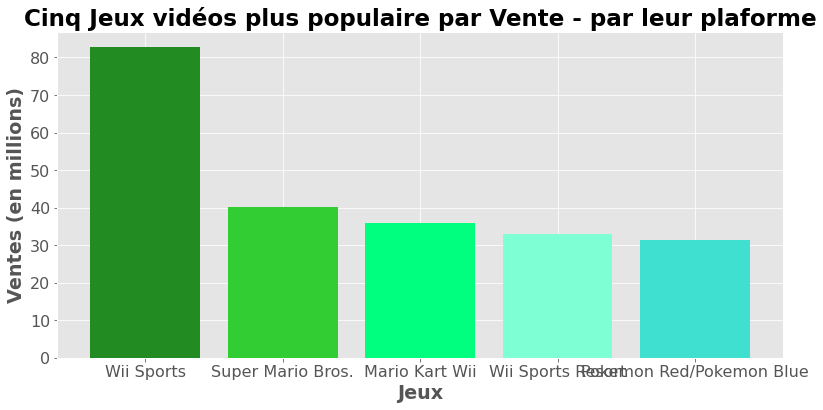

In [23]:
a = vg['Name'][:5]
b = vg['Global_Sales'][:5]

plt.figure(figsize=[13, 6])
plt.title('Cinq Jeux vidéos plus populaire par Vente - par leur plaforme', 
          weight='bold')
plt.xlabel('Jeux', weight='bold')
plt.ylabel('Ventes (en millions)', weight='bold')
plt.bar(a, b, color=['forestgreen', 'limegreen', 'springgreen', 'aquamarine', 'turquoise'])
plt.savefig("5 VG parvente par platform")
plt.show()

What are the most popular videogames across all of their platforms?

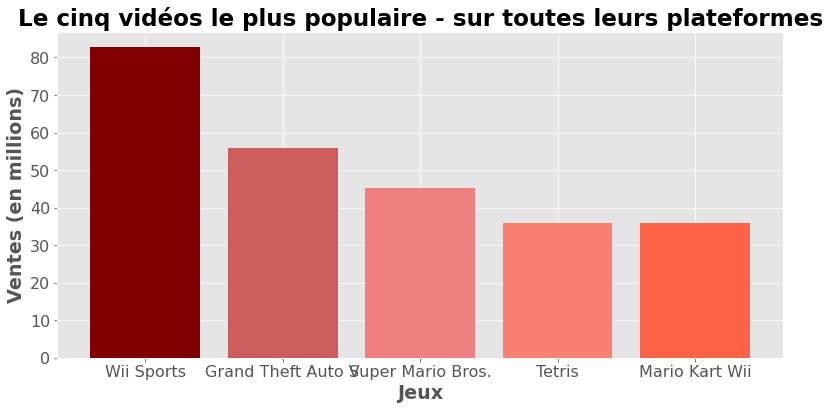

In [24]:
c = vg_sales_all_plat['Name'][:5]
d = vg_sales_all_plat['Global_Sales'][:5]

plt.figure(figsize=[13, 6])
plt.title('Le cinq vidéos le plus populaire - sur toutes leurs plateformes', 
          weight='bold')
plt.xlabel('Jeux', weight='bold')
plt.ylabel('Ventes (en millions)', weight='bold')
plt.bar(c, d, color=['maroon', 'indianred', 'lightcoral', 'salmon', 'tomato'])
plt.savefig("5 VG plus populaire pr platform")
plt.show()

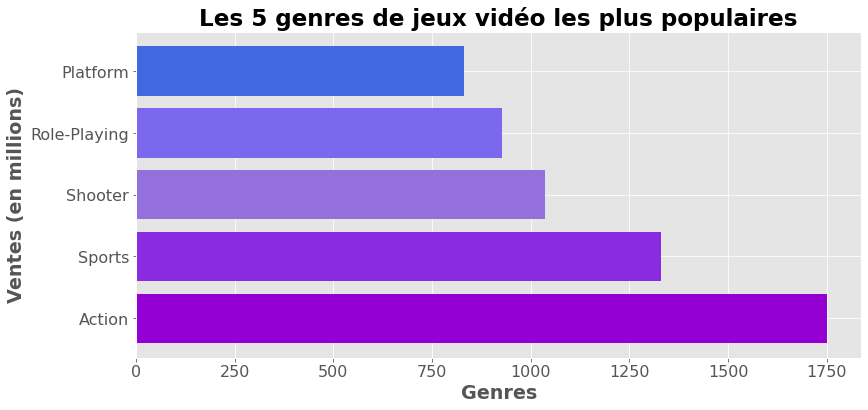

In [25]:
e = vg_top_genre['Genre'][:5]
f = vg_top_genre['Global_Sales'][:5]

plt.figure(figsize=[13, 6])
plt.title('Les 5 genres de jeux vidéo les plus populaires', 
          weight='bold')
plt.xlabel('Genres', weight='bold')
plt.ylabel('Ventes (en millions)', weight='bold')
plt.barh(e, f, color=['darkviolet', 'blueviolet', 'mediumpurple', 'mediumslateblue', 'royalblue'])
plt.savefig("5 genre VG plus populaire")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


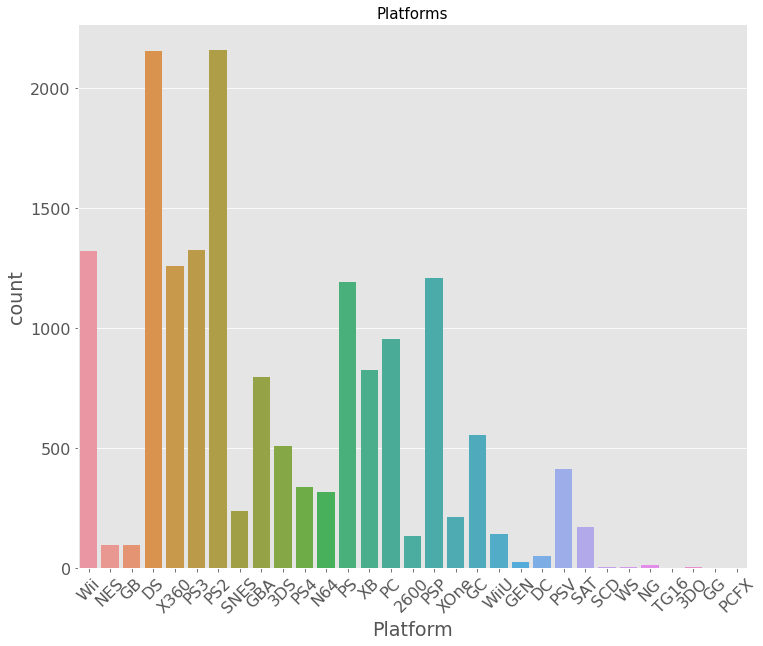

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(vg["Platform"])
plt.xticks(rotation=45)
plt.title("Platforms", size=15)
plt.savefig("platfrms")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


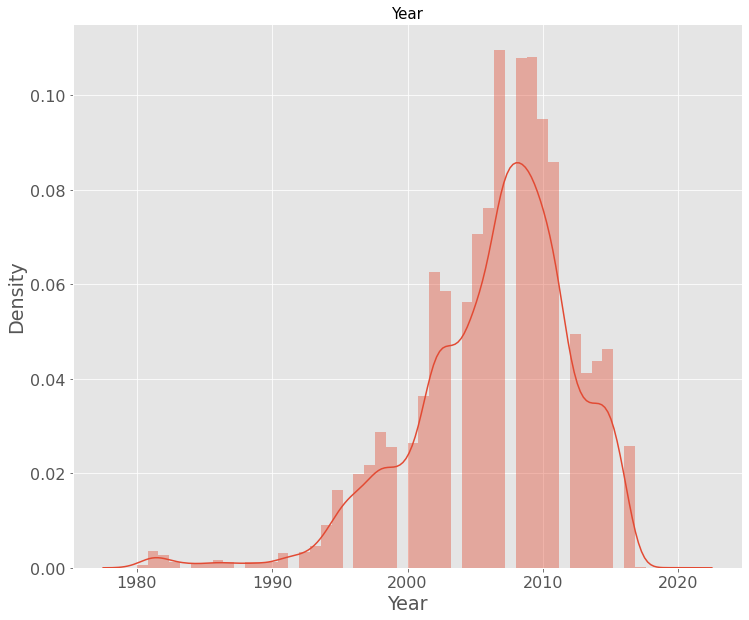

In [27]:
plt.figure(figsize=(12,10))
sns.distplot(vg["Year"])
plt.title("Year", size=15)
plt.savefig("évolution de vente")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


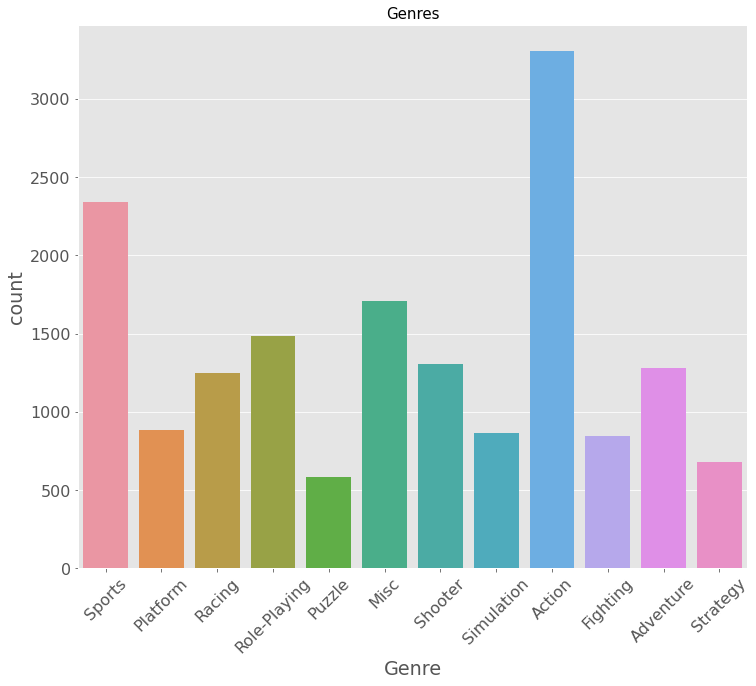

In [28]:
plt.figure(figsize=(12,10))
sns.countplot(vg["Genre"])
plt.xticks(rotation=45)
plt.title("Genres", size=15)
plt.show()

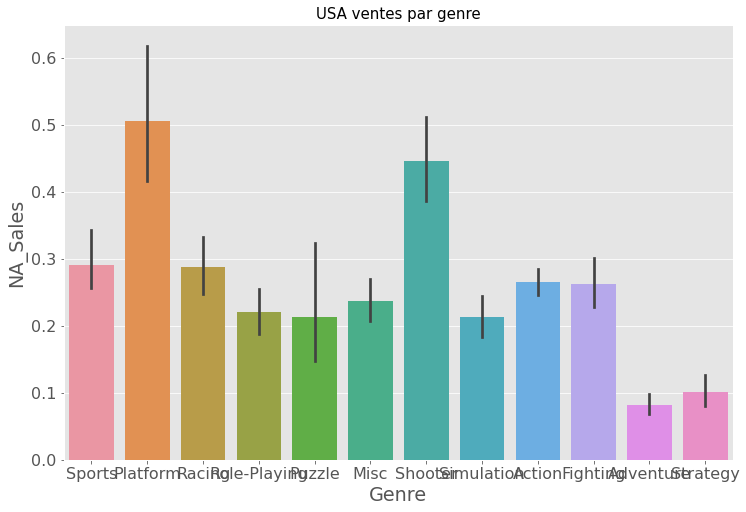

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x=vg["Genre"], y=vg["NA_Sales"])
plt.title("USA ventes par genre", size=15)
plt.savefig("USA vente par genre")
plt.show()

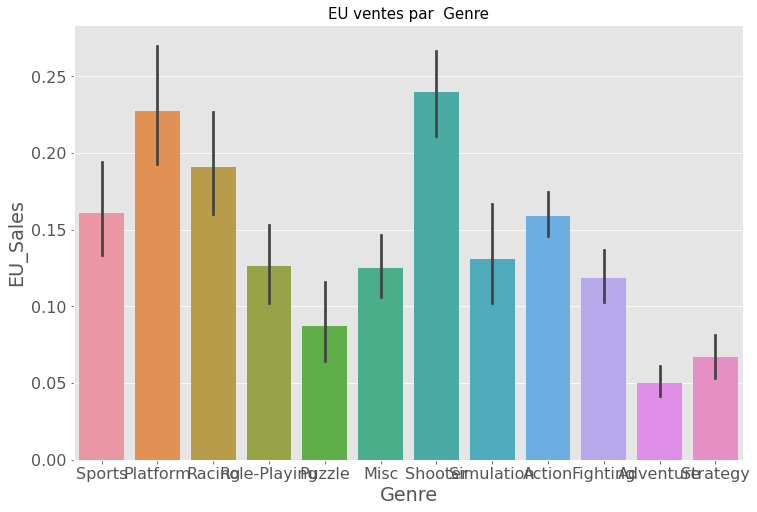

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x=vg["Genre"], y=vg["EU_Sales"])
plt.title("EU ventes par  Genre", size=15)
plt.savefig("Eu vente par genre")
plt.show()

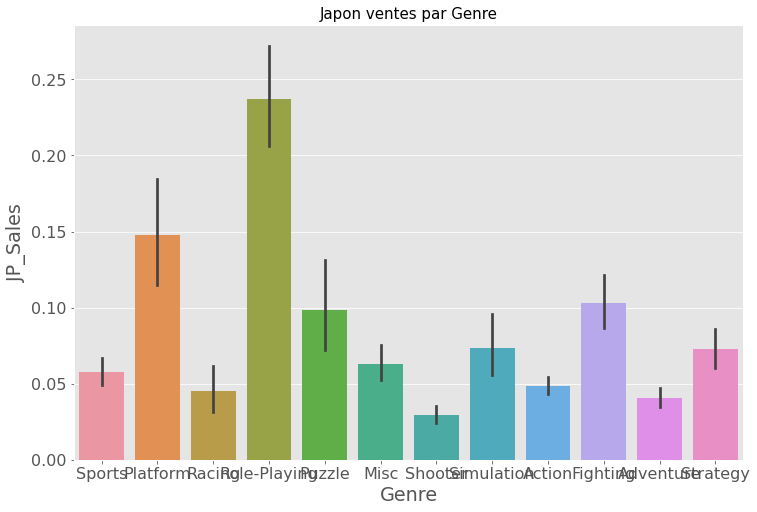

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x=vg["Genre"], y=vg["JP_Sales"])
plt.title("Japon ventes par Genre", size=15)
plt.savefig("Japon vente par genre")
plt.show()

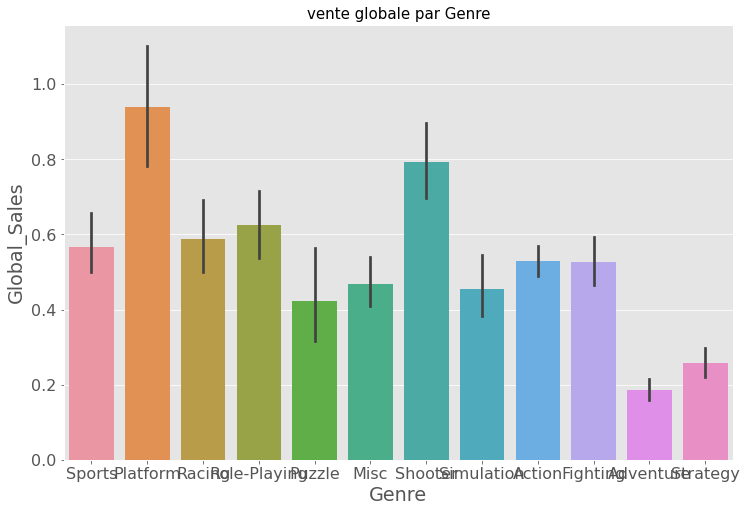

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x=vg["Genre"], y=vg["Global_Sales"])
plt.title("vente globale par Genre", size=15)
plt.show()

In [33]:
vg.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [34]:
vgr=vg.groupby('Genre').sum().reset_index()

In [35]:
#les ventes annuelles 
tk = vg.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
tk

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99


In [36]:
#creation d'un fichier csv chiffre d'affaire 
CA = pd.DataFrame(tk, columns = ['Other_Sales','NA_Sales','JP_Sales','EU_Sales']).to_csv()

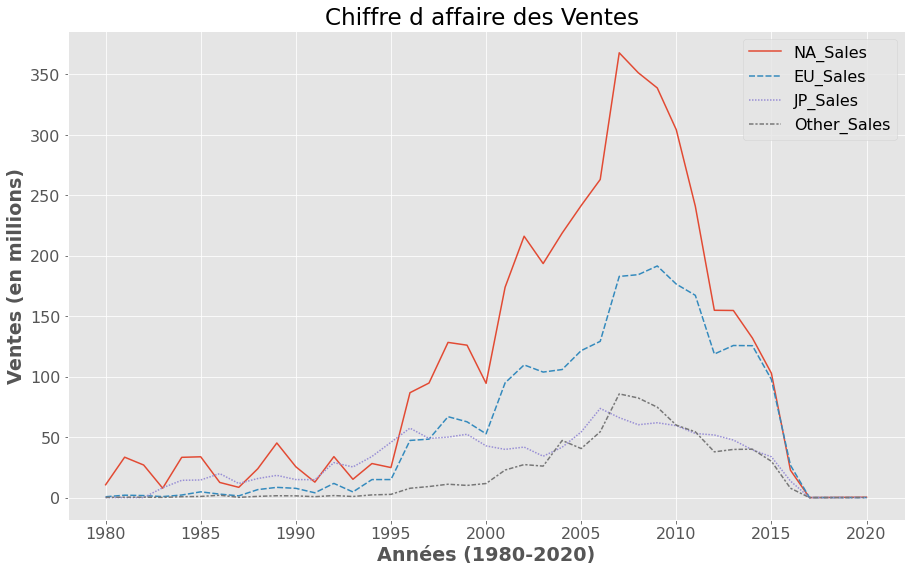

In [37]:
plt.figure(figsize=(15, 9))
plt.xlabel('Années (1980-2020)', weight='bold')
plt.ylabel('Ventes (en millions)', weight='bold')
plt.title("Chiffre d affaire des Ventes ")
sns.lineplot(data=tk)
plt.savefig("Evolution de chiffre d'affaire ")
plt.show()

Nous voyons que les ventes de jeux vidéo ont atteint leur apogée entre 2005 et 2010, mais les ventes ont depuis considérablement chuté

In [38]:
tk.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

In [39]:
vg.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [40]:
# ratio des categories 
grn=vg['Genre'].value_counts()
vg_cat =round(grn/grn.sum(),2)
vg_cat

Action          0.20
Sports          0.14
Misc            0.10
Role-Playing    0.09
Shooter         0.08
Adventure       0.08
Racing          0.08
Platform        0.05
Simulation      0.05
Fighting        0.05
Strategy        0.04
Puzzle          0.04
Name: Genre, dtype: float64

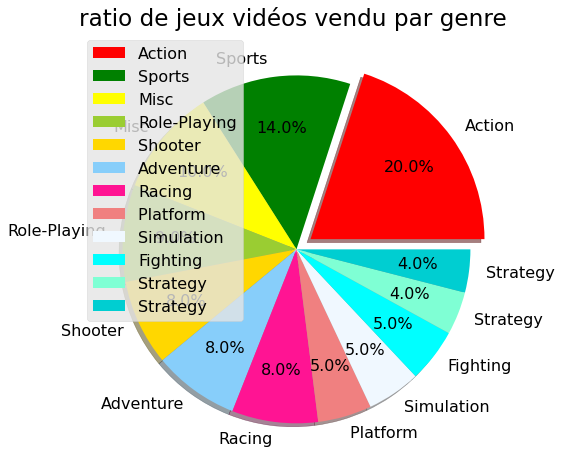

In [41]:
plt.figure(figsize = (8, 8))
plt.pie(vg_cat, labels = ['Action','Sports ','Misc','Role-Playing','Shooter','Adventure','Racing','Platform ','Simulation','Fighting','Strategy','Strategy'],
           colors = ['red', 'green', 'yellow','yellowgreen', 'gold', 'lightskyblue','deeppink', 'lightcoral','aliceblue',  'aqua', 'aquamarine', 'darkturquoise'],
           explode = [0.1,0, 0,0,0,0,0,0,0,0,0,0],
           autopct = lambda grn: str(round(grn, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True)
plt.title('ratio de jeux vidéos vendu par genre ')
plt.savefig("ratio jeux videos ")
plt.legend()

Pour que nos modèles puissent comprendre nos données, les données doivent être sous forme numérique. Par conséquent, nous utiliserons Label Encoder afin de convertir nos variables catégorielles en variables numériques.

In [42]:
le = LabelEncoder()

vg['Name'] = le.fit_transform(vg['Name'])
vg['Platform'] = le.fit_transform(vg['Platform'])
vg['Genre'] = le.fit_transform(vg['Genre'])
vg['Publisher'] = le.fit_transform(vg['Publisher'])

In [43]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  int32  
 2   Platform      16540 non-null  int32  
 3   Year          16540 non-null  int64  
 4   Genre         16540 non-null  int32  
 5   Publisher     16540 non-null  int32  
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(5), int32(4), int64(2)
memory usage: 1.8 MB


In [44]:
X = vg.drop(columns=['Global_Sales', 'JP_Sales', 'Other_Sales'])
y = vg['Global_Sales']

## Train-test-split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train set :",X_train.shape)
print("Test set :",X_test.shape)

Train set : (13232, 8)
Test set : (3308, 8)


## La regression Linéaire 

In [46]:
#Modélisation du modèle
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

Évaluation du modèle : régression linéaire

In [47]:
def model_score(lr, model_name='Model Name'):
    print(f'Score of {model_name} Model: {lr.score(X_test, y_test) * 100}%')

In [48]:
model_score(lr, ' Regression Linéaire')

Score of  Regression Linéaire Model: 96.09885391450405%


In [49]:
def mse(lr_pred, model_name='Model Name'):
    print('Mean Squared Error: {} of {} model'.format(mean_squared_error(y_test, lr_pred), model_name))

In [50]:
mse(lr_pred, ' Regression linéaire ')

Mean Squared Error: 0.06781036723858601 of  Regression linéaire  model


In [51]:
def mae(lr_pred, model_name='Model Name'):
    print('Mean Absolute Error: {} of {} model'.format(mean_absolute_error(y_test, lr_pred), model_name))

In [52]:
mae(lr_pred, 'Regression linéaire ')

Mean Absolute Error: 0.11696914553316615 of Regression linéaire  model


In [53]:
def cross_val(lr, model_name='Model Name'):
    print('Cross Validation: {} of {} model'.format(str(np.mean(cross_val_score(lr, X, y, cv=5))), model_name))

In [54]:
cross_val(lr, 'Regression linéaire ')

Cross Validation: -10.732971472552945 of Regression linéaire  model


### arbre de décision

In [55]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [56]:
model_score(dtr, 'Décision arbre')

Score of Décision arbre Model: 99.13465871868755%


In [57]:
mse(dtr_pred, 'Decision Tree Regressor')

Mean Squared Error: 0.015041505441354288 of Decision Tree Regressor model


In [58]:
mae(dtr_pred, 'Decision Tree Regressor')

Mean Absolute Error: 0.004972793228537038 of Decision Tree Regressor model


In [59]:
cross_val(dtr, 'Decision Tree Regressor')

Cross Validation: -0.9686061944640428 of Decision Tree Regressor model


## Random Forest Regressor¶

In [60]:
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)
rfg_pred = rfg.predict(X_test)

In [61]:
print(f'Score of Random Forest Regressor Model: {rfg.score(X_test, y_test) * 100}%')

Score of Random Forest Regressor Model: 99.55395260222531%


In [62]:
model_score(rfg, 'Random Forest Regressor')

Score of Random Forest Regressor Model: 99.55395260222531%


In [63]:
print(f'Mean Absolute Error: ' + str(mean_absolute_error(rfg_pred, y_test)) + ' - Random Forest Regressor')

Mean Absolute Error: 0.003605441354292887 - Random Forest Regressor


In [64]:
mse(rfg_pred, 'Random Forest Regressor')

Mean Squared Error: 0.007753269727932283 of Random Forest Regressor model


In [65]:
mae(rfg_pred, 'Random Forest Regressor')

Mean Absolute Error: 0.003605441354292887 of Random Forest Regressor model


In [66]:
cross_val(rfg, 'Random Forest Regressor')

Cross Validation: -0.9678774567819651 of Random Forest Regressor model


In [67]:
vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,10959,26,2006,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9289,11,1985,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5549,26,2008,6,359,15.85,12.88,3.79,3.31,35.82
3,4,10961,26,2009,10,359,15.75,11.01,3.28,2.96,33.00
4,5,7318,5,1996,7,359,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,11053,6,2002,4,269,0.01,0.00,0.00,0.00,0.01
16594,16597,5772,7,2003,8,241,0.01,0.00,0.00,0.00,0.01
16595,16598,8114,16,2008,6,21,0.00,0.00,0.00,0.00,0.01
16596,16599,4991,4,2010,5,8,0.00,0.01,0.00,0.00,0.01


In [68]:
tk.reset_index()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,10.59,0.67,0.00,0.12
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70
5,1985,33.73,4.74,14.56,0.92
6,1986,12.50,2.84,19.81,1.93
7,1987,8.46,1.41,11.63,0.20
8,1988,23.87,6.59,15.76,0.99
9,1989,45.15,8.44,18.36,1.50


#### XGBoost

In [69]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
xgb_pred = xgb.predict(X_test)

In [70]:
model_score(xgb, 'XGBoost')

Score of XGBoost Model: 99.8207990962207%


In [71]:
mse(xgb_pred, 'XGBoost')

Mean Squared Error: 0.0031148997828970284 of XGBoost model


In [72]:
mae(xgb_pred, 'XGBoost')

Mean Absolute Error: 0.0023312030012799297 of XGBoost model


In [73]:
cross_val(xgb, 'XGBoost')

Cross Validation: -0.9704120677690135 of XGBoost model


#### Conclusion

A partir de ces résultats, nous voyons que notre meilleur modèle est la Régression Linéaire ! Cela est logique car les ventes mondiales suivent une tendance linéaire qui dépend fortement des ventes NA et UE. Notre modèle de régression linéaire obtient de très bons résultats en termes de précision, d'erreur quadratique moyenne et d'erreur absolue moyenne. Cependant, la validation croisée sur notre modèle ne retourne pas un très bon résultat ; cela signifie que les performances de notre modèle dépendent de la façon dont les données sont divisées, et si les données devaient être divisées différemment, les résultats varieraient.

In [74]:
o_vg

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.49,29.02,3.77,8.46,82.74
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Sports,15.75,11.01,3.28,2.96,33.00
4,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16593,Platform,0.01,0.00,0.00,0.00,0.01
16594,Shooter,0.01,0.00,0.00,0.00,0.01
16595,Racing,0.00,0.00,0.00,0.00,0.01
16596,Puzzle,0.00,0.01,0.00,0.00,0.01


### Classification CAH

In [75]:
yz=o_vg.groupby('Genre').sum()

In [76]:
yz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Action to Strategy
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      12 non-null     float64
 1   EU_Sales      12 non-null     float64
 2   JP_Sales      12 non-null     float64
 3   Other_Sales   12 non-null     float64
 4   Global_Sales  12 non-null     float64
dtypes: float64(5)
memory usage: 576.0+ bytes


In [77]:
# préparation des données pour le clustering
X = yz.values

In [78]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
names =yz.index

In [79]:
names

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

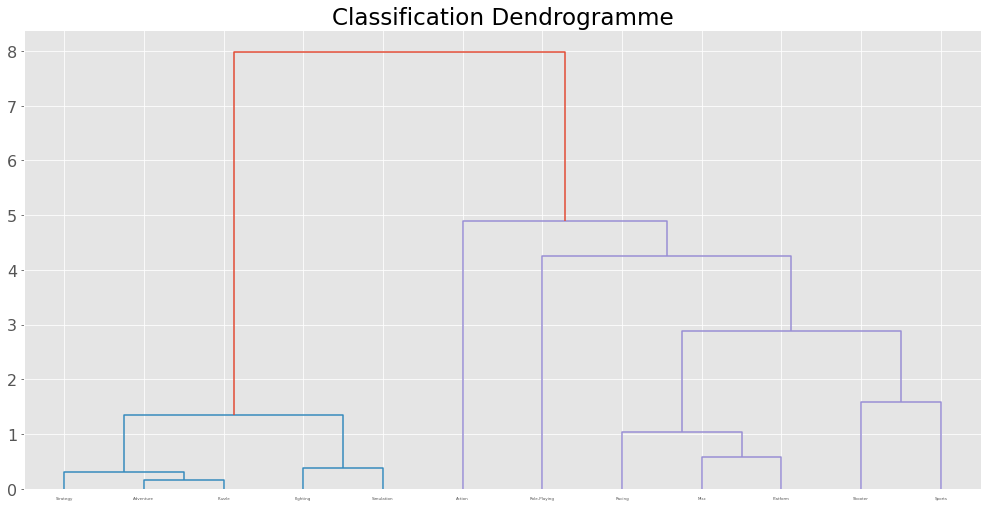

In [80]:
from scipy.cluster import hierarchy
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')
# Affichage du dendrogramme
hierarchy.dendrogram(Z,leaf_font_size=4 ,labels=names,color_threshold=7)
plt.tight_layout()
plt.title('Classification Dendrogramme')
plt.savefig("Dendrogramme_p8")

In [81]:
#moyenne
print(np.mean(X_scaled,axis=0))

[-4.62592927e-16  0.00000000e+00  4.62592927e-17 -7.40148683e-17
 -1.85037171e-16]


In [82]:
#écart-type
print(np.std(X_scaled,axis=0,ddof=0))

[1. 1. 1. 1. 1.]


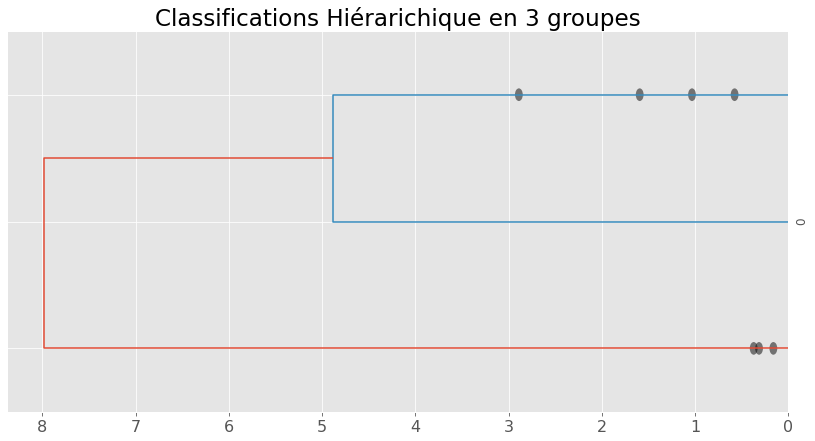

In [83]:
# Coupage du dendrogramme en 3 clusters
dendrogram(Z,
    truncate_mode='lastp',  # afficher uniquement les p derniers clusters
    p=3,  # afficher le p clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
            leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,orientation='left'  # to get a distribution impression in truncated branches
)
plt.title("Classifications Hiérarichique en 3 groupes")
plt.savefig("image_dendrogramme")
plt.show()

In [84]:
#Coupage du dendrogramme en 3 clusters
groupes_vg = fcluster(Z,3,criterion='maxclust')
# ajout des clusters à le table
print('Numérotation de nos groupes : ' + str(np.unique(groupes_vg)))

Numérotation de nos groupes : [1 2 3]


In [85]:
#index triés des groupes
idg = np.argsort(groupes_vg)

In [86]:
names

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [87]:
#affichage des observations et leurs groupes
pp_groupes_vg = pd.DataFrame(names[idg], groupes_vg[idg]).reset_index()
pp_groupes_vg = pp_groupes_vg.rename(columns={'index':'Groupe'})
pp_groupes_vg 

,Groupe,Genre
0,1,Adventure
1,1,Fighting
2,1,Puzzle
3,1,Simulation
4,1,Strategy
5,2,Misc
6,2,Platform
7,2,Racing
8,2,Role-Playing
9,2,Shooter


In [88]:
Dern=pd.merge(vgr,pp_groupes_vg,on="Genre")
Dern["Groupe"]=Dern.Groupe.astype("category")# changement de cluster en variable 
p=Dern.Groupe.value_counts() # taille des differents groupes ou clusters
p

2    6
1    5
3    1
Name: Groupe, dtype: int64

In [89]:
# caractéristique de centre des classe (centroide)
group =Dern.groupby('Groupe').mean()
group

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Groupe,,,,,,,
1,8.218624e+06,1.705375e+06,140.664000,74.700000,61.926000,21.696000,299.240000
2,1.162191e+07,3.002519e+06,467.258333,255.171667,136.828333,83.541667,943.171667
3,2.636144e+07,6.644109e+06,877.540000,524.920000,159.490000,187.350000,1750.330000


<ipython-input-90-8c6c1c7d29a1>:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters2.astype(np.float), cmap = 'jet', alpha=0.5)


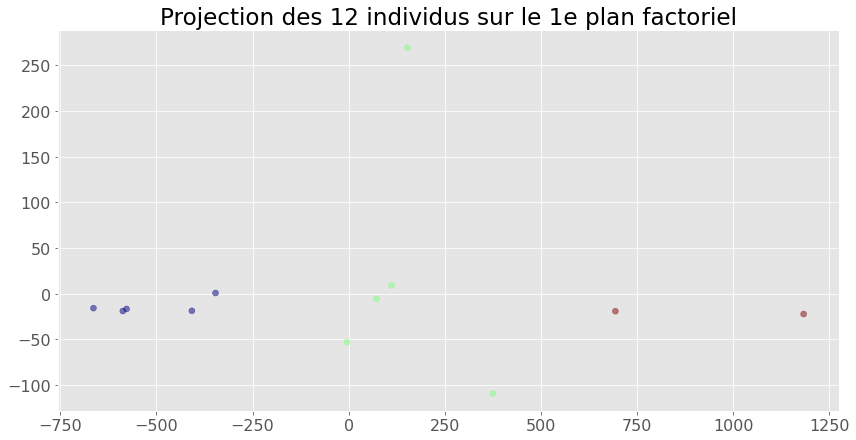

In [90]:
#Affichage du clustering par projection des individus sur le premier plan factoriel:

n_clust =3
X = yz.values

km = KMeans(n_clusters=n_clust)
km.fit(X)
clusters2 = km.labels_

pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters2.astype(np.float), cmap = 'jet', alpha=0.5)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

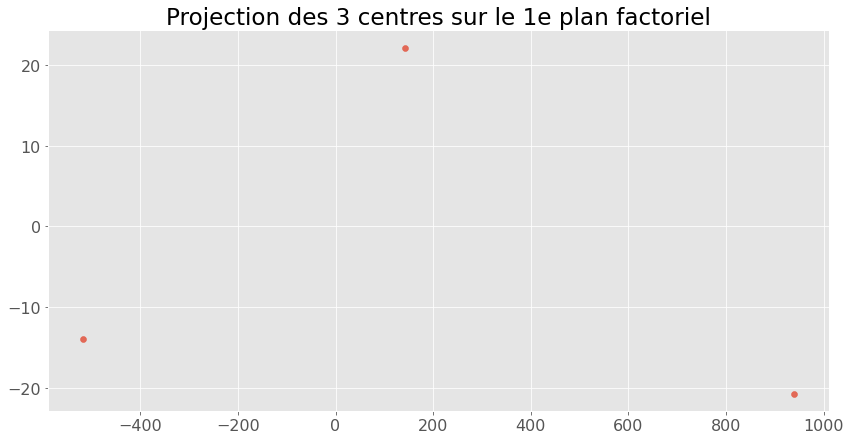

In [91]:
#Affichage des positions des centres de classes sur le plan factoriel:
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1],cmap = 'jet',alpha=0.8)
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.savefig("image_centroides")
plt.show()

In [92]:
#standardisation(centre et réduit)
Z = (yz - yz.mean(axis=0))/yz.std(axis=0)
print(Z)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action        2.048863  2.213733  0.599850     2.255828      2.103410
Adventure    -1.038878 -0.949941 -0.640642    -0.925513     -1.050161
Fighting     -0.573838 -0.701839 -0.232607    -0.563055     -0.618443
Misc          0.157223  0.078782  0.002452     0.164098      0.125220
Platform      0.326758 -0.009090  0.268437    -0.276709      0.185139
Puzzle       -0.966431 -1.041314 -0.579253    -1.004981     -1.037289
Racing       -0.023792  0.246631 -0.586407     0.202339     -0.021072
Role-Playing -0.152363 -0.098885  2.824314    -0.127099      0.386342
Shooter       0.868963  0.760546 -0.798849     0.676537      0.615856
Simulation   -0.728291 -0.612731 -0.506208    -0.651105     -0.730561
Sports        1.268797  1.193454  0.320134     1.276839      1.225119
Strategy     -1.187010 -1.079346 -0.671222    -1.027180     -1.183560


In [93]:
#cluster de 110
res =cluster.KMeans(n_clusters=10)
res.fit(Z)

KMeans(n_clusters=10)

In [94]:
#num. de cluster affectés aux groupes
res.labels_

array([4, 0, 9, 8, 3, 0, 7, 2, 1, 6, 5, 0])

In [95]:
#identification du nombre de groupes -- 1 à 10
#coude = KElbowVisualizer(res,k=(1,5),metric='distortion',timings=False)
#calculs
#coude.fit(Z)

In [96]:
#ici je vais choisir les variables que j'ai jugé utile
for idx,column in enumerate(Dern.columns):
       print(idx,column)

0 Genre
1 Rank
2 Year
3 NA_Sales
4 EU_Sales
5 JP_Sales
6 Other_Sales
7 Global_Sales
8 Groupe


In [97]:
#création de dataframe avec les variables de mon choix 
dern=Dern.iloc[:,[0,3,4,5,6,7]]

In [98]:
# choix du nombre de composantes à calculer
n_comp = 3

In [99]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca =dern[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

In [100]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
# ou data.index pour avoir les intitulés
names =Dern["Genre"]

In [101]:
features = dern.columns

In [102]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [103]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=3)

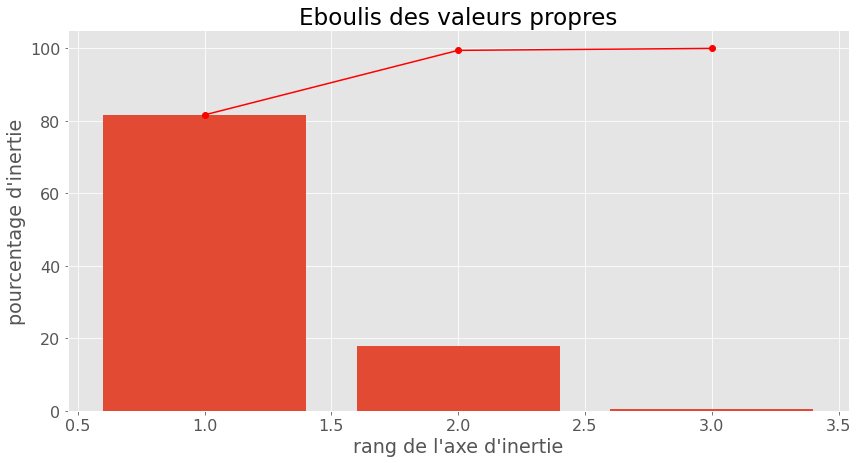

In [104]:
# Eboulis des valeurs propres
display_scree_plot(pca)
plt.show()

In [105]:
# Inertie cumulées des axes factoriels
pca.explained_variance_ratio_.cumsum().round(2)

array([0.82, 0.99, 1.  ])

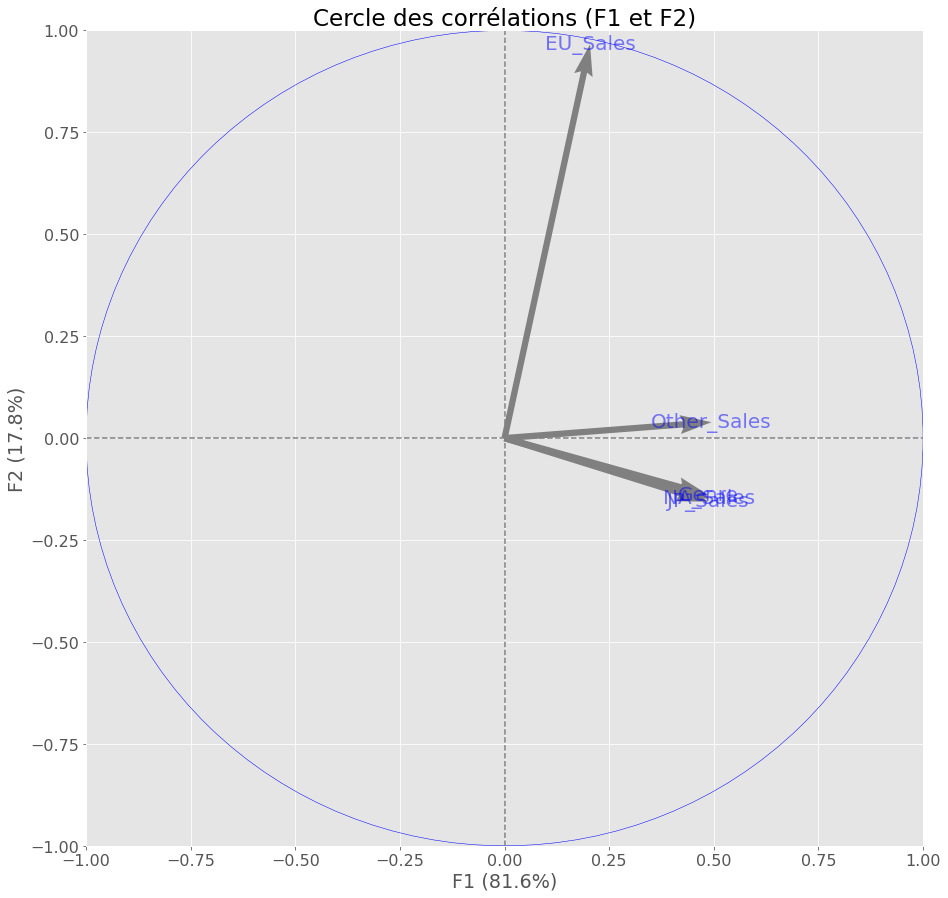

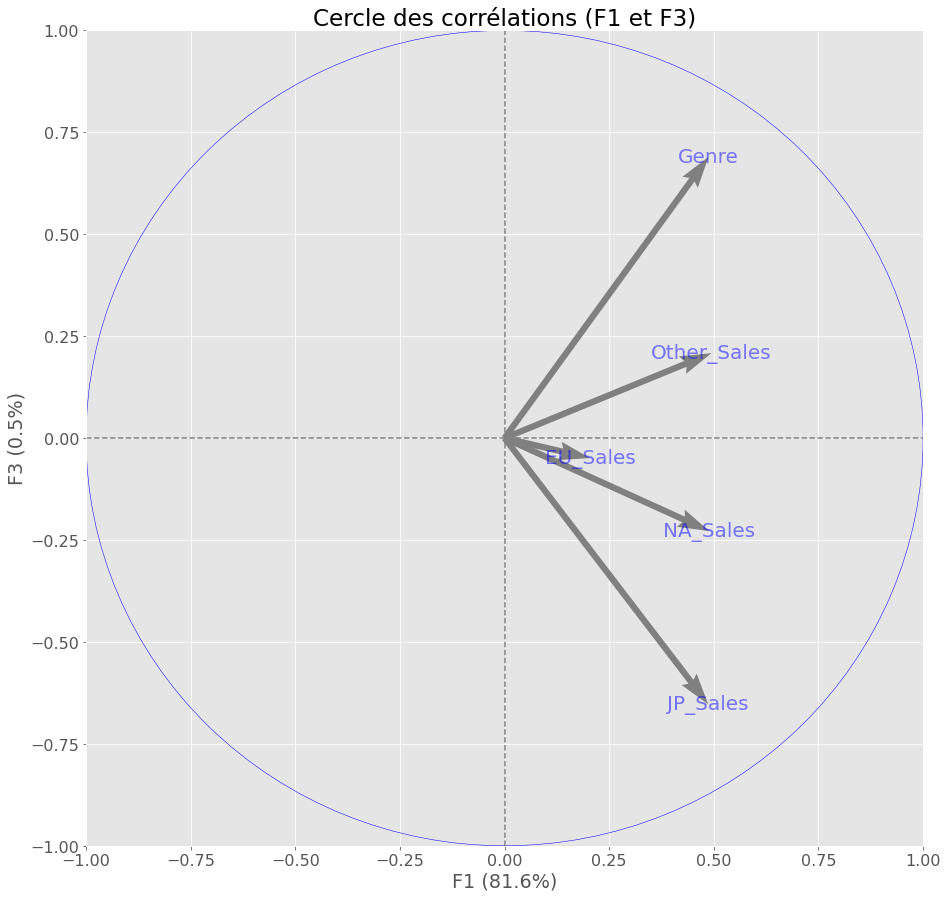

In [106]:
# Cercle des corrélations
plt.rcParams['figure.figsize'] = [1, 1]
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(0,2)], labels = np.array(features))

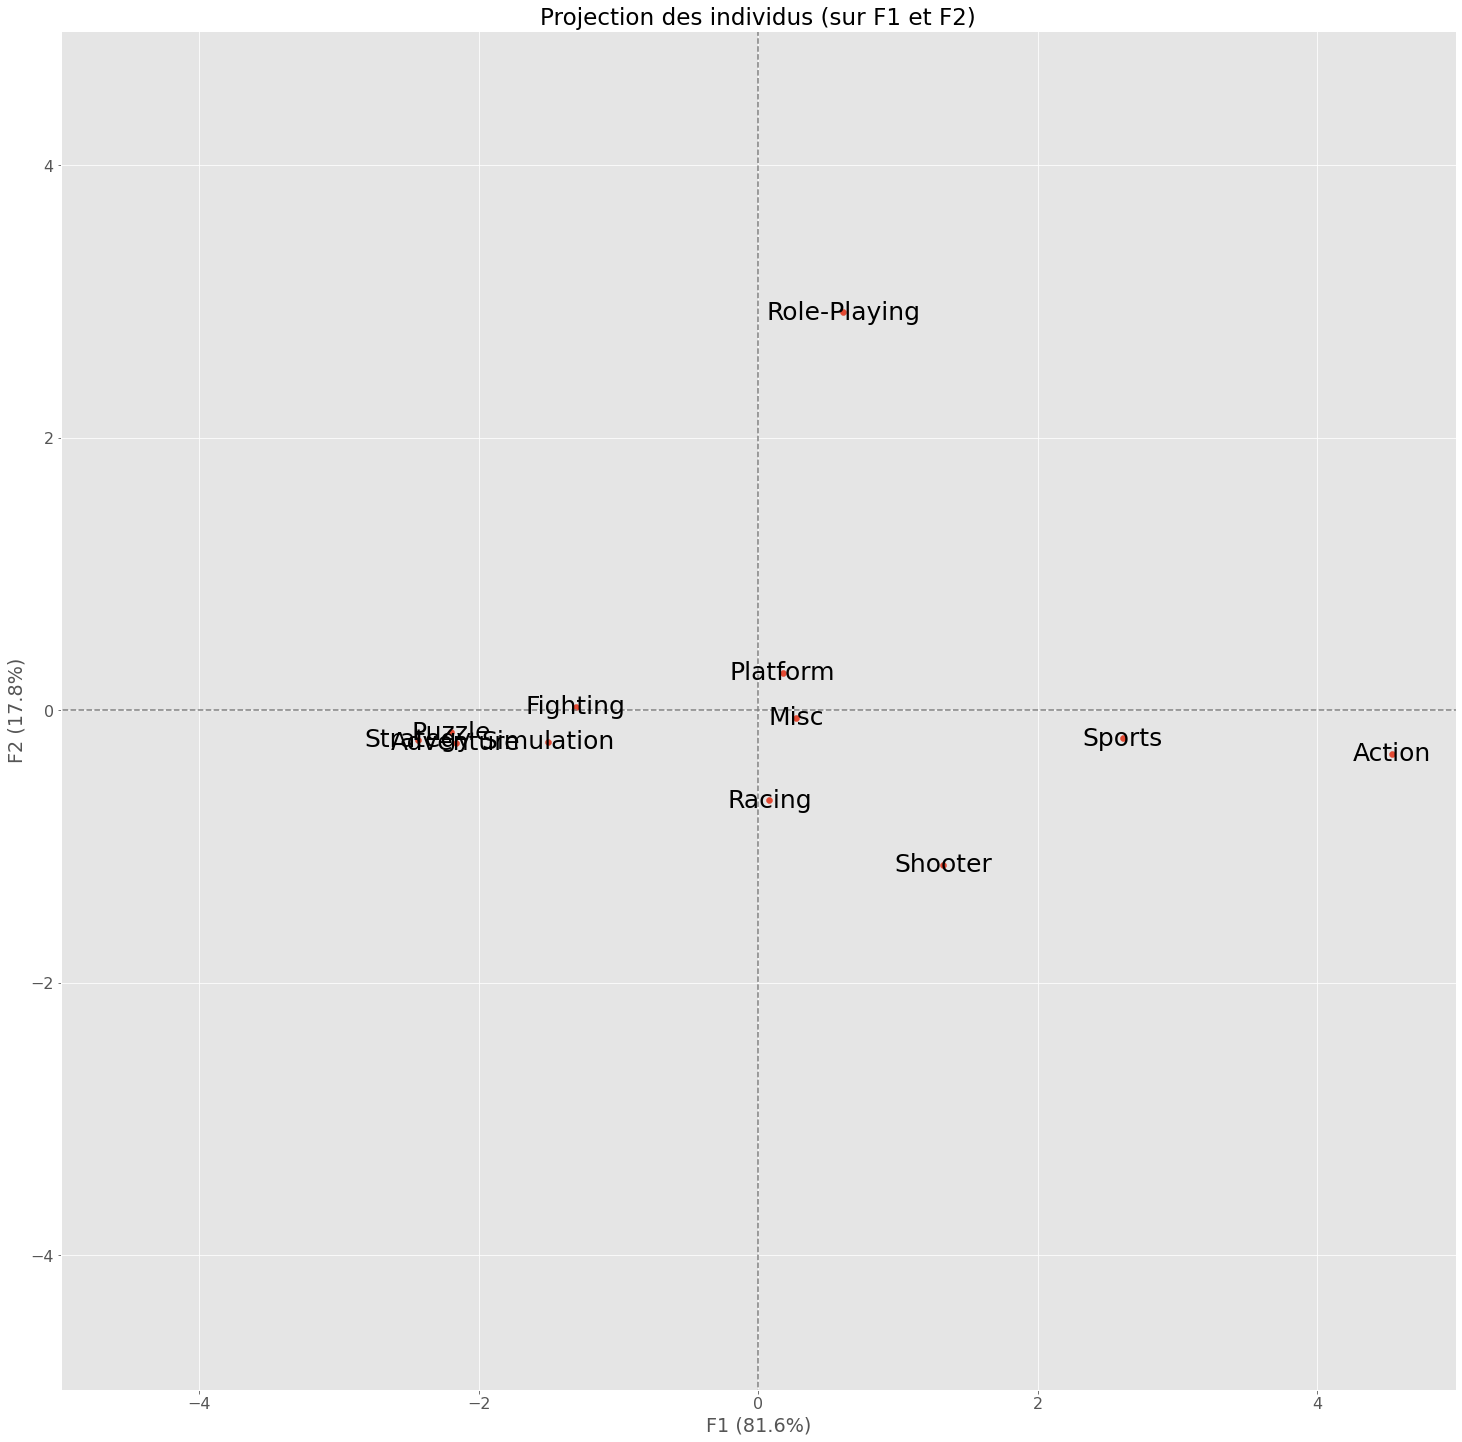

In [107]:
# Projection des individus pour la 1 ere plan factoriel
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)],labels = np.array(names))
plt.show()

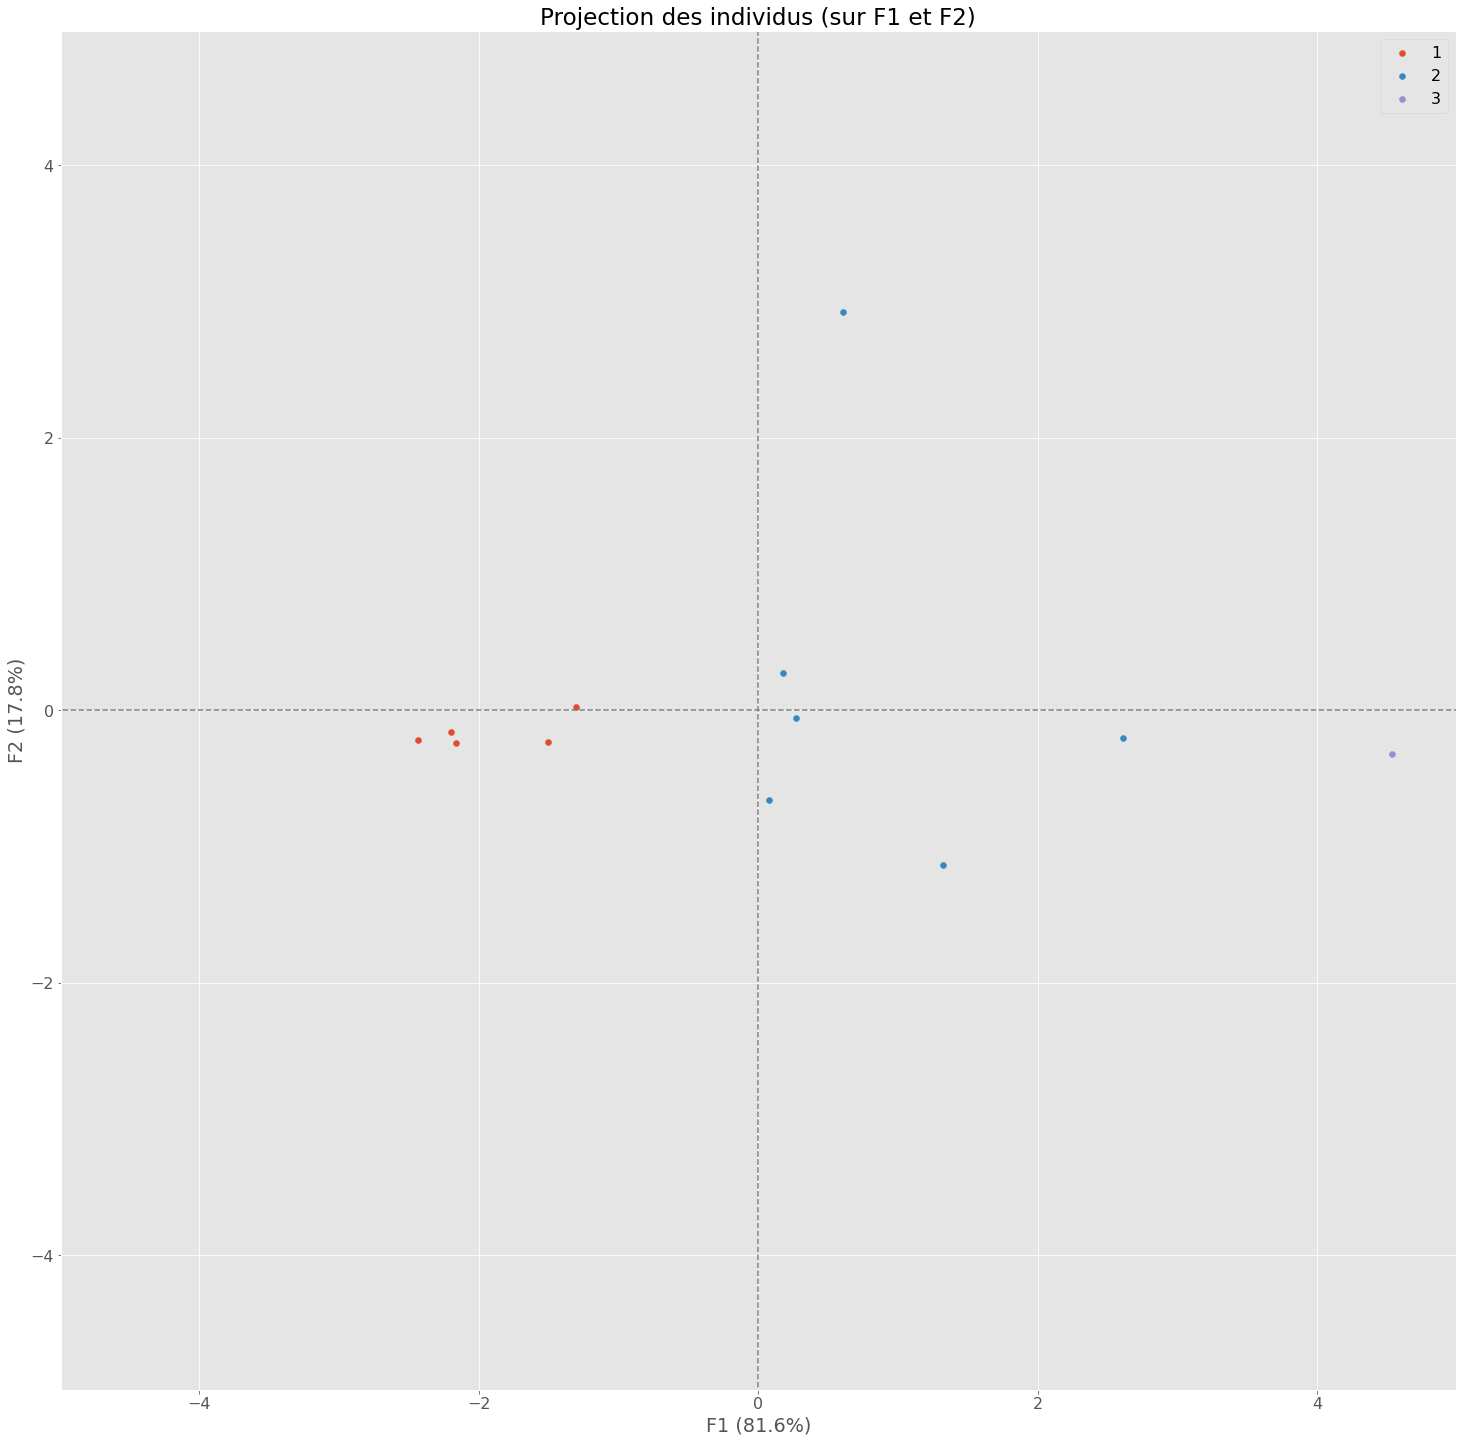

In [108]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var = groupes_vg)
plt.show()

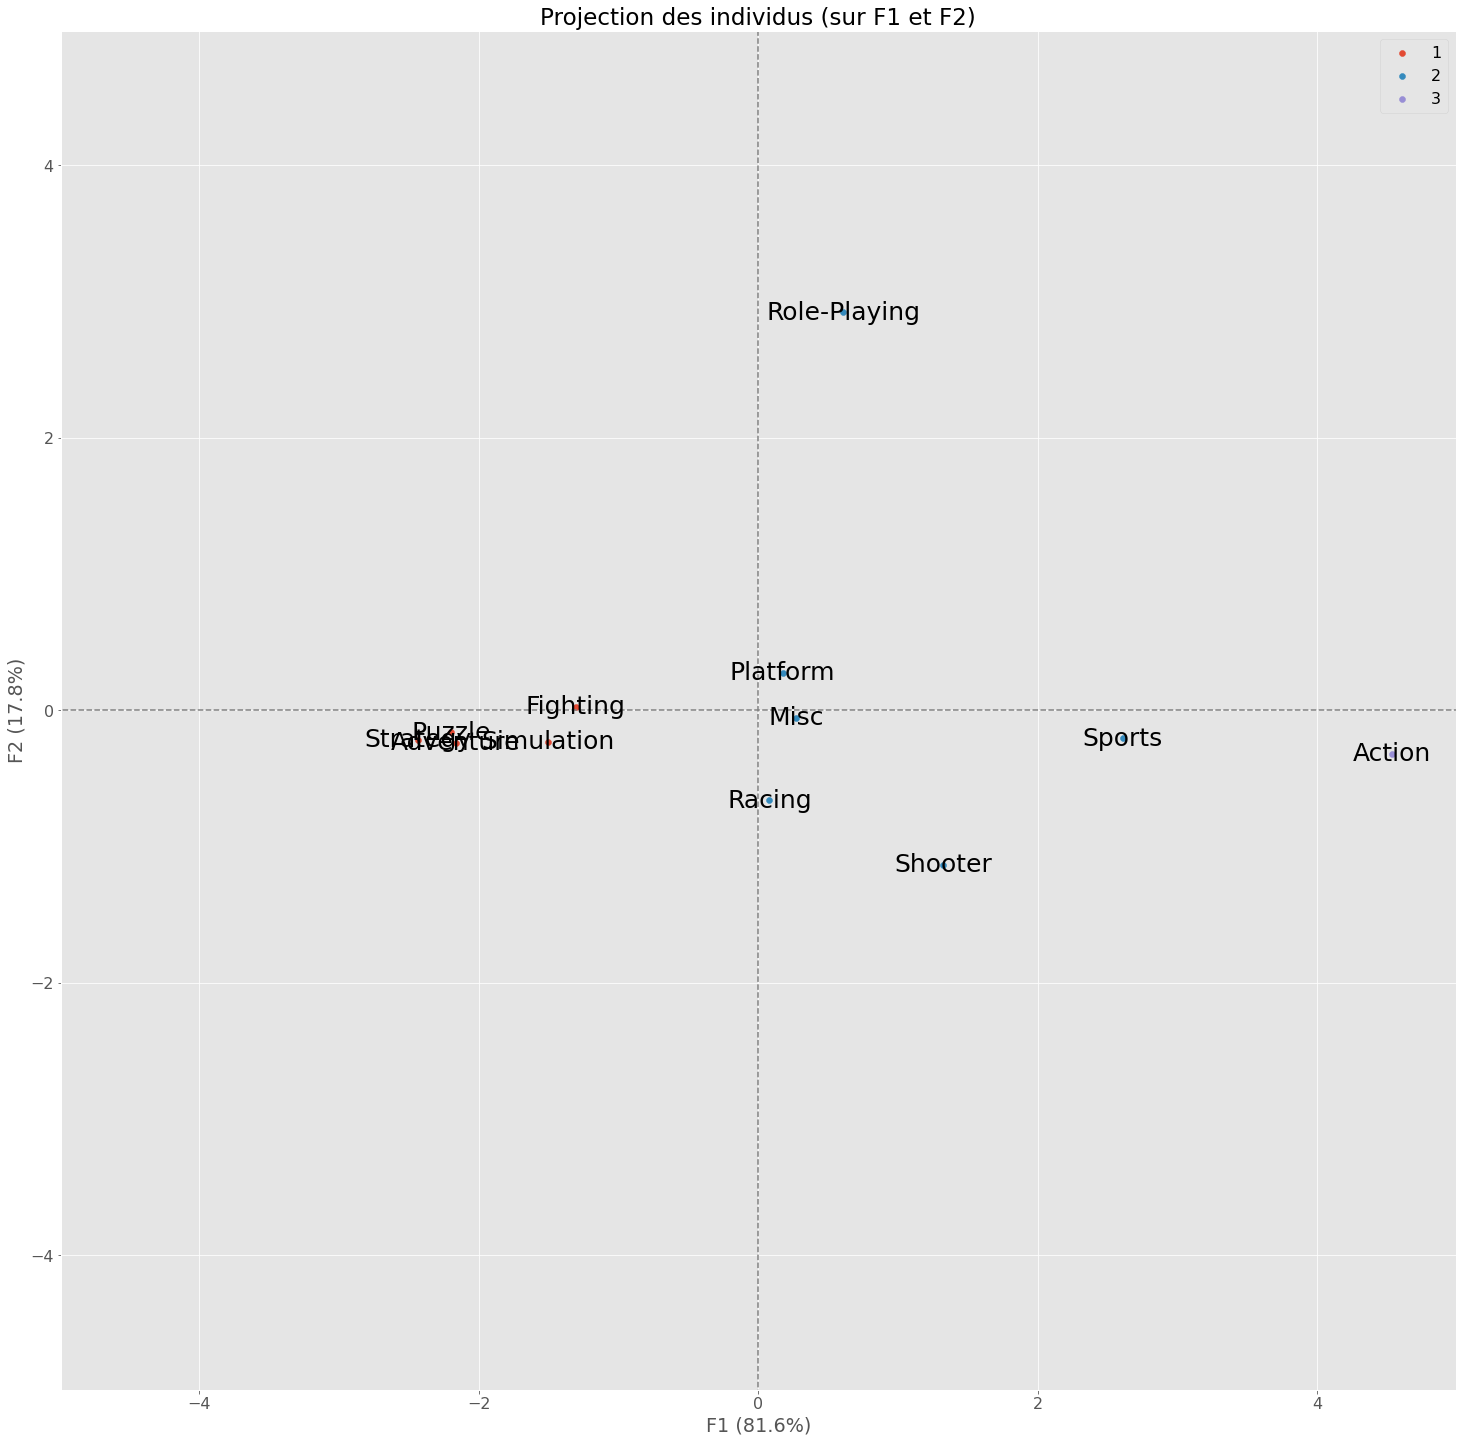

In [109]:
#pays du cadran sup droit sur le 1 ér plan factoriel
display_factorial_planes(X_projected,7,pca,[(0,1)],illustrative_var=groupes_vg,labels=np.array(names))


### un test d'adéquation ( la loi normale)

In [110]:
from scipy.stats import ks_2samp
import statsmodels
import scipy.stats as stats

In [111]:
Dern

,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Groupe
0,Action,26361435,6644109,877.54,524.92,159.49,187.35,1750.33,3
1,Adventure,14778800,2574411,105.67,64.08,51.99,16.81,238.77,1
2,Fighting,6476418,1695941,221.92,100.22,87.35,36.24,445.70,1
3,Misc,14667633,3436490,404.67,213.93,107.72,75.22,802.15,2
4,Platform,6118339,1771398,447.05,201.13,130.77,51.59,830.87,2
5,Puzzle,5586639,1165057,123.78,50.77,57.31,12.55,244.94,1
6,Racing,9927387,2502084,359.42,238.38,56.69,77.27,732.03,2
7,Role-Playing,12002392,2982477,327.28,188.05,352.26,59.61,927.31,2
8,Shooter,9623676,2623770,582.59,313.24,38.28,102.69,1037.32,2
9,Simulation,7426751,1731663,183.31,113.20,63.64,31.52,391.96,1


#### Pour tester l’adéquation à une loi normale on utilise test Kolmogorov-Smirnov

In [112]:
# test de normalité par Kolmogorov-Smirnov de vente au USA
ks_2samp(Dern['NA_Sales'],list(np.random.normal(np.mean(Dern['NA_Sales']), np.std(Dern['NA_Sales']),1000000)))

KstestResult(statistic=0.1432646666666667, pvalue=0.9372652215692219)

In [113]:
# test de normalité par Kolmogorov-Smirnov de vente en europe
ks_2samp(Dern['EU_Sales'],list(np.random.normal(np.mean(Dern['EU_Sales']), np.std(Dern['EU_Sales']),1000000)))

KstestResult(statistic=0.15507966666666667, pvalue=0.8931944581119371)

In [114]:
# test de normalité par Kolmogorov-Smirnov de vente au japon
ks_2samp(Dern['JP_Sales'],list(np.random.normal(np.mean(Dern['JP_Sales']), np.std(Dern['JP_Sales']),1000000)))

KstestResult(statistic=0.20222833333333334, pvalue=0.6399149407479678)

In [115]:
# test de normalité par Kolmogorov-Smirnov de vente autre pays
ks_2samp(Dern['Other_Sales'],list(np.random.normal(np.mean(Dern['Other_Sales']), np.std(Dern['Other_Sales']),1000000)))

KstestResult(statistic=0.16623699999999997, pvalue=0.8419697939785585)

#### On  ne peut donc pas rejetter l’hypothèse de normalité au niveau de test 5% car le p_value est proche de 1

###### on peut donc dire que la variable Na_Sales suit une loi normal